In [64]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import librosa
from simple import simple_fast
from pathlib import Path

examples = list(Path("../data/raw/birdclef-2022/train_audio").glob("**/*.ogg"))
examples[:3]

[WindowsPath('../data/raw/birdclef-2022/train_audio/afrsil1/XC125458.ogg'),
 WindowsPath('../data/raw/birdclef-2022/train_audio/afrsil1/XC175522.ogg'),
 WindowsPath('../data/raw/birdclef-2022/train_audio/afrsil1/XC177993.ogg')]

In [3]:
import IPython.display as ipd

example = examples[151]
data, sample_rate = librosa.load(example)
duration = librosa.get_duration(y=data, sr=sample_rate)
print(f"{example}, {duration:.2f} seconds")
ipd.Audio(data, rate=sample_rate)

..\data\raw\birdclef-2022\train_audio\apapan\XC454885.ogg, 52.27 seconds


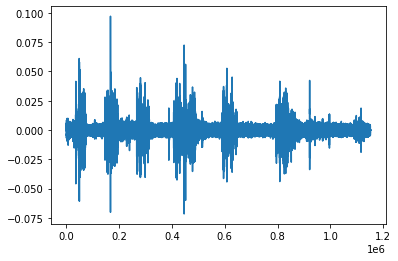

In [5]:
import matplotlib.pyplot as plt

plt.plot(data)

In [7]:
from birdclef.utils import cens_per_sec

cens_sr = 10
cens = librosa.feature.chroma_cens(
    y=data, sr=sample_rate, hop_length=cens_per_sec(sample_rate, cens_sr)
)
cens

array([[0.27944696, 0.2830897 , 0.2867435 , ..., 0.27649555, 0.27691683,
        0.27731702],
       [0.29637885, 0.29574332, 0.2949761 , ..., 0.30686957, 0.3102458 ,
        0.313878  ],
       [0.24941207, 0.24978182, 0.2501121 , ..., 0.26105458, 0.26243487,
        0.26378748],
       ...,
       [0.26249474, 0.26462233, 0.26659113, ..., 0.30048308, 0.30169296,
        0.30270943],
       [0.27243665, 0.27487335, 0.2771221 , ..., 0.27628076, 0.27634236,
        0.27645952],
       [0.2869416 , 0.28663245, 0.28642663, ..., 0.2899043 , 0.29251903,
        0.29527628]], dtype=float32)

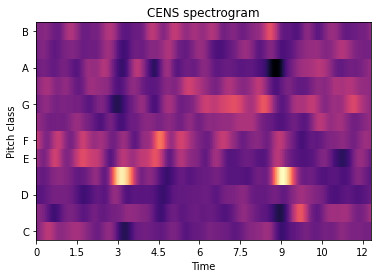

In [11]:
import librosa.display

img = librosa.display.specshow(cens, x_axis="time", y_axis="chroma", sr=sample_rate)
plt.title("CENS spectrogram")
plt.show()

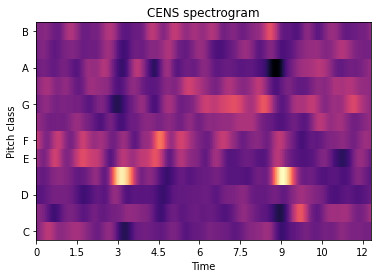

0 41


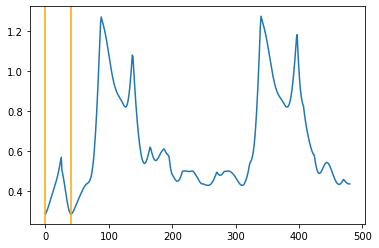

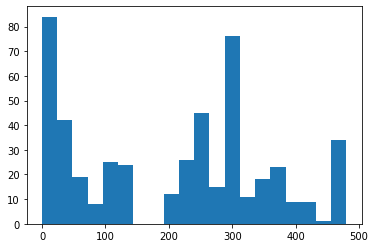

In [40]:
import numpy as np
from birdclef.utils import compute_offset

# 5 second windows
def plot_simple(data, sample_rate, cens_sr, mp_window, method=np.argmin):
    cens = librosa.feature.chroma_cens(
        y=data, sr=sample_rate, hop_length=cens_per_sec(sample_rate, cens_sr)
    )
    img = librosa.display.specshow(cens, x_axis="time", y_axis="chroma", sr=sample_rate)
    plt.title("CENS spectrogram")
    plt.show()

    mp, pi = simple_fast(cens, cens, mp_window)
    motif = method(mp)
    print(motif, pi[motif])
    plt.plot(mp)
    plt.axvline(motif, c="orange")
    plt.axvline(pi[motif], c="orange")
    plt.show()

    plt.hist(pi, bins=20)
    plt.show()

    s0, s1 = compute_offset(motif, mp_window, cens.shape[1], data.shape[0])
    ipd.display(ipd.Audio(data[s0:s1], rate=sample_rate))
    s0, s1 = compute_offset(pi[motif], mp_window, cens.shape[1], data.shape[0])
    ipd.display(ipd.Audio(data[s0:s1], rate=sample_rate))


plot_simple(data, sample_rate, 10, 50)

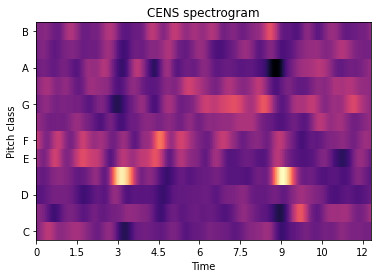

39 0


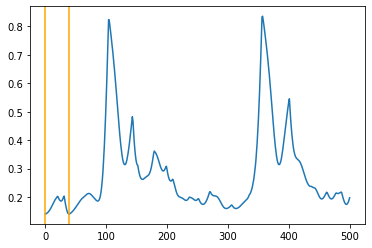

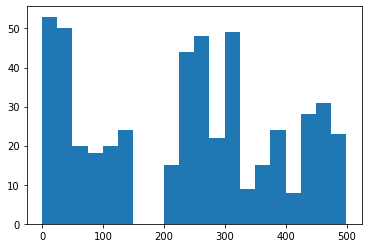

In [36]:
plot_simple(data, sample_rate, 10, 30)

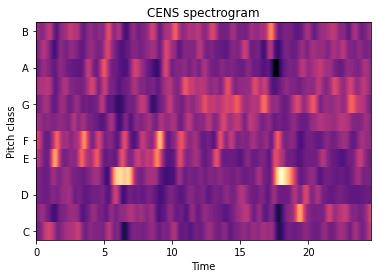

527 983


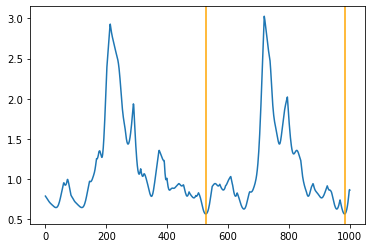

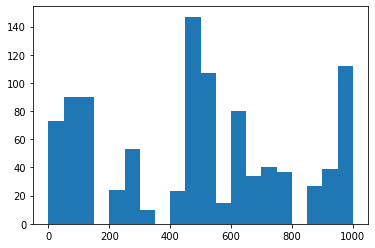

In [38]:
plot_simple(data, sample_rate, 20, 60)

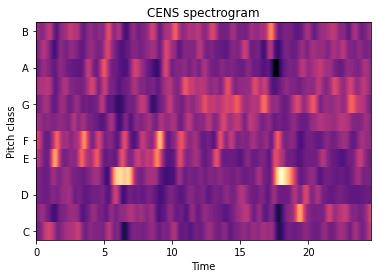

719 210


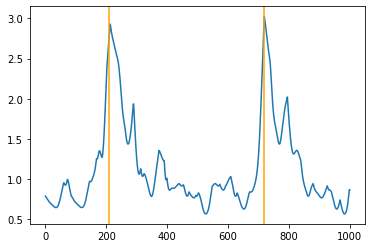

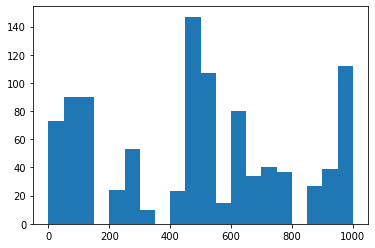

In [41]:
plot_simple(data, sample_rate, 20, 60, method=np.argmax)

## new example

In [43]:
example = examples[5668]
data, sample_rate = librosa.load(example)

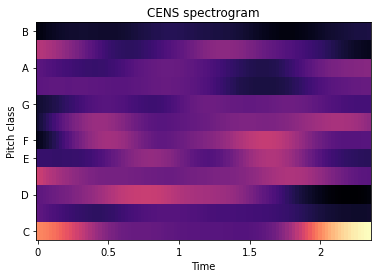

33 7


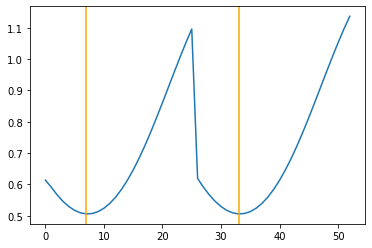

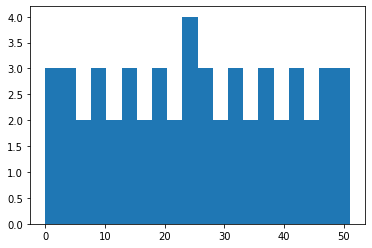

In [47]:
plot_simple(data, sample_rate, 10, 50, method=np.argmin)

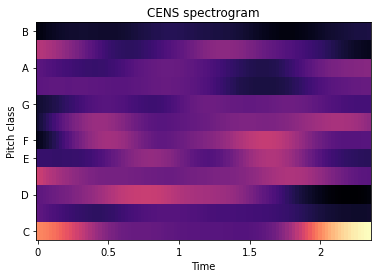

52 26


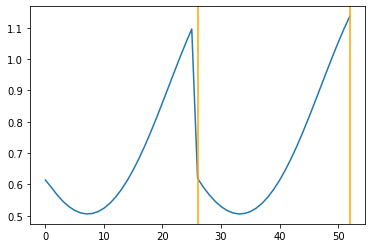

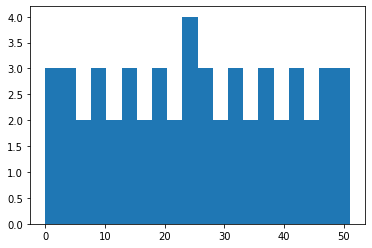

In [48]:
plot_simple(data, sample_rate, 10, 50, method=np.argmax)

## performing in parallel

In [56]:
example = examples[9001]
data, sample_rate = librosa.load(example)
data.shape[0] / sample_rate

24.7118820861678

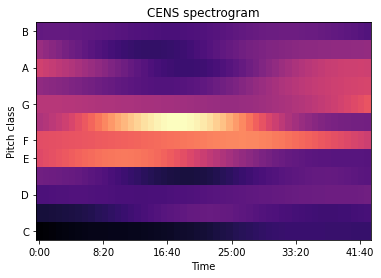

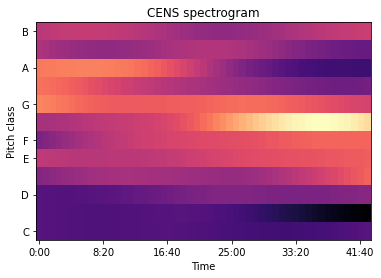

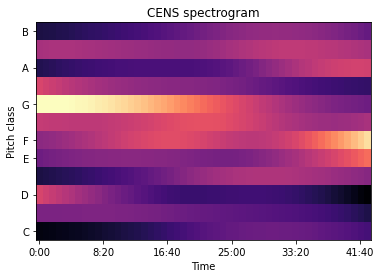

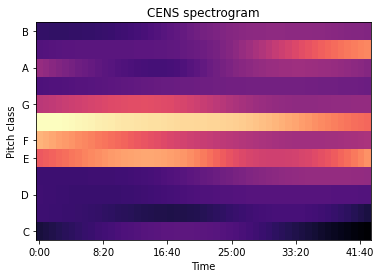

In [77]:
from birdclef.utils import slice_seconds

slices = np.array([x for _, x in slice_seconds(data, sample_rate, 5)])
slices.shape
cens = librosa.feature.chroma_cens(
    y=slices, sr=sample_rate, hop_length=cens_per_sec(sample_rate, cens_sr)
)
for row in cens:
    img = librosa.display.specshow(row, x_axis="time", y_axis="chroma", sr=cens_sr)
    plt.title("CENS spectrogram")
    plt.show()

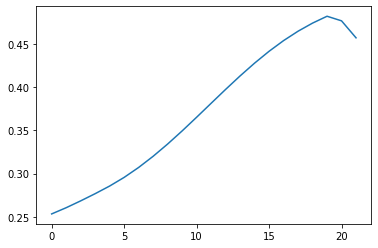

In [81]:
mp, pi = simple_fast(cens[0], cens[1], 30)
plt.plot(mp)